In [630]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [586]:
red = np.uint8([[[180, 0, 2]]])

In [587]:
cv2.cvtColor(red, cv2.COLOR_RGB2HSV)

array([[[  0, 255, 180]]], dtype=uint8)

In [631]:
def show(img):
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="bicubic")
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def cv2show(img):
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [632]:
base_items = []
for i in range(1, 11):
    base_items.append(cv2.cvtColor(cv2.imread("data/train/%d.png"%i, cv2.IMREAD_COLOR), 
                                  cv2.COLOR_BGR2HSV))

def decompose_by_channels(path):
    data = {"H": np.uint8([]), "S": np.uint8([]), "V": np.uint8([])}
    for img_name in os.listdir(path):
        #print(img_name)
        im = cv2.imread(path+img_name, cv2.IMREAD_COLOR)
        for name, channel in zip(["H", "S", "V"], cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))):
            data[name] = np.append(data[name], channel.reshape(channel.shape[0]*channel.shape[1]))
    return data

In [633]:
R = decompose_by_channels("data/R/")
Y = decompose_by_channels("data/Y/")
B = decompose_by_channels("data/B/")
Bg = decompose_by_channels("data/bg/")
D = decompose_by_channels("data/D/")

### Red

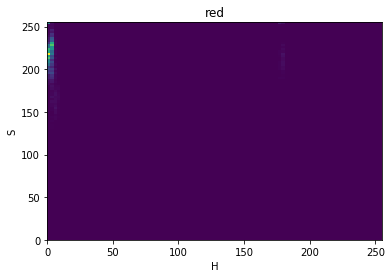

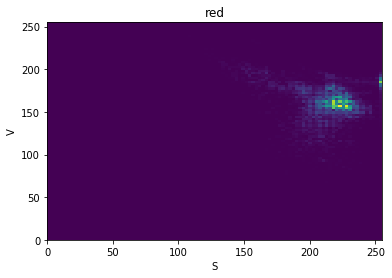

In [634]:
plt.hist2d(R["H"], R["S"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("H")
plt.ylabel("S")
plt.title("red")
plt.show()
plt.hist2d(R["S"], R["V"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("S")
plt.ylabel("V")
plt.title("red")
plt.show()

### Yellow

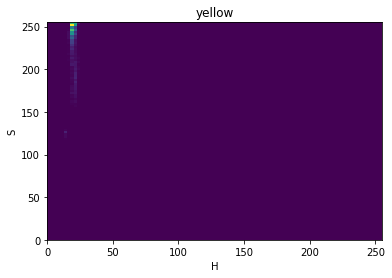

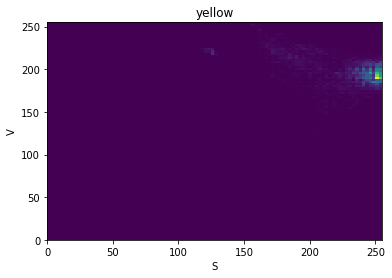

In [635]:
plt.hist2d(Y["H"], Y["S"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("H")
plt.ylabel("S")
plt.title("yellow")
plt.show()
plt.hist2d(Y["S"], Y["V"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("S")
plt.ylabel("V")
plt.title("yellow")
plt.show()

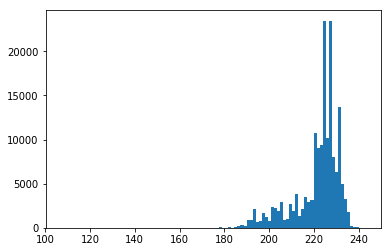

In [666]:
plt.hist(Bg["V"], bins=100)
plt.show()

### Blue

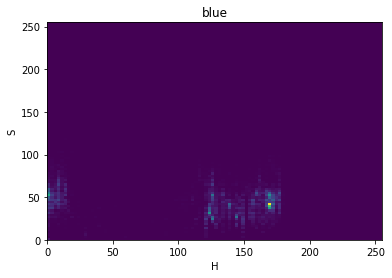

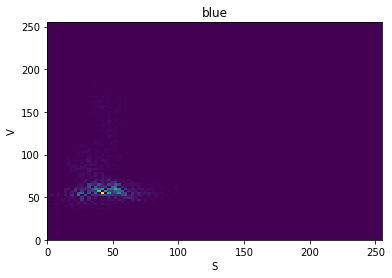

In [637]:
plt.hist2d(B["H"], B["S"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("H")
plt.ylabel("S")
plt.title("blue")
plt.show()
plt.hist2d(B["S"], B["V"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("S")
plt.ylabel("V")
plt.title("blue")
plt.show()

---

BACKUP

In [667]:
low_yellow = np.array([13, 140, 150]) #ok!
high_yellow = np.array([ 25, 255, 255]) #ok!
low_red = np.array([0, 110, 75]) #ok 
high_red = np.array([12, 255, 240]) #ok
low_blue = np.array([100, 0, 25]) #ok 
high_blue = np.array([180, 100, 175]) #ok
low_blue_2 = np.array([0, 0, 25]) #ok
high_blue_2 = np.array([25, 100, 175]) #ok
low_bg = np.array([12, 110, 180])#np.array([40, 100, 170])
high_bg = np.array([16, 170, 240])#np.array([255, 255, 255])
low_dark = np.array([0, 50, 0])
high_dark = np.array([25, 200, 150])

---

In [624]:
low_yellow = np.array([13, 140, 150]) #ok!
high_yellow = np.array([ 25, 255, 255]) #ok!
low_red = np.array([0, 110, 75]) #ok 
high_red = np.array([12, 255, 255]) #ok
low_blue = np.array([100, 0, 25]) #ok 
high_blue = np.array([180, 100, 175]) #ok
low_blue_2 = np.array([0, 0, 25]) #ok
high_blue_2 = np.array([25, 100, 175]) #ok
low_bg = np.array([40, 100, 170])
high_bg = np.array([255, 255, 255])
low_dark = np.array([0, 50, 0])
high_dark = np.array([25, 200, 150])

In [ ]:
for img in base_items:
    mask = cv2.inRange(img, low_dark, high_dark)
    pattern = cv2.bitwise_and(img, img, mask=mask)
    blur = cv2.bilateralFilter(pattern,15,100,50)
    show(cv2.cvtColor(blur, cv2.COLOR_HSV2BGR))

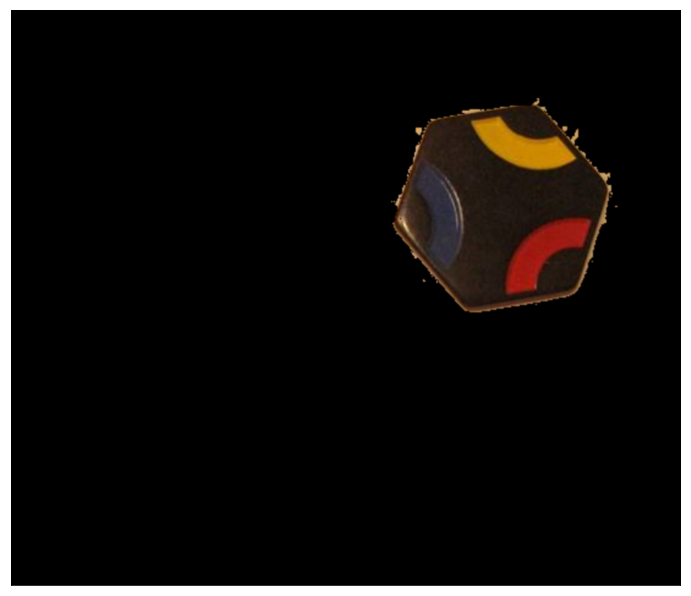

In [678]:
img_segment = img.copy()
img_segment[markers != 3] = [0, 0, 0]
img_segment = cv2.cvtColor(img_segment, cv2.COLOR_BGR2HSV)
mask = cv2.bitwise_not(cv2.inRange(img_segment, low_bg, high_bg))
segment_wo_bg = cv2.bitwise_and(img_segment, img_segment, mask=mask)
mask = cv2.bitwise_not(cv2.inRange(segment_wo_bg, low_dark, high_dark))
maybe_fishka = cv2.bitwise_and(segment_wo_bg, segment_wo_bg, mask=mask)
red_pixels = cv2.bitwise_and(maybe_fishka, maybe_fishka,
                             mask=cv2.inRange(maybe_fishka, low_yellow, high_yellow))
show(cv2.cvtColor(segment_wo_bg, cv2.COLOR_HSV2BGR))

In [610]:
sum(sum(cv2.inRange(maybe_fishka, low_yellow, high_yellow) == 255))

2139

In [679]:
def generate_color_features(img_segment):
    img_segment = cv2.cvtColor(img_segment, cv2.COLOR_BGR2HSV)
    mask = cv2.bitwise_not(cv2.inRange(img_segment, low_bg, high_bg))
    segment_wo_bg = cv2.bitwise_and(img_segment, img_segment, mask=mask)
    mask = cv2.bitwise_not(cv2.inRange(segment_wo_bg, low_dark, high_dark))
    maybe_fishka = cv2.bitwise_and(segment_wo_bg, segment_wo_bg, mask=mask)
    red_pixels = sum(sum(cv2.inRange(maybe_fishka, low_red, high_red) == 255))
    yellow_pixels = sum(sum(cv2.inRange(maybe_fishka, low_yellow, high_yellow) == 255))
    blue_pixels = sum(sum(cv2.bitwise_or(cv2.inRange(maybe_fishka, low_blue, high_blue),
                                    cv2.inRange(maybe_fishka, low_blue_2, high_blue_2)) == 255))
    all_coloured_pixels = red_pixels + yellow_pixels + blue_pixels
    return [red_pixels/all_coloured_pixels, 
            yellow_pixels/all_coloured_pixels, 
            blue_pixels/all_coloured_pixels]

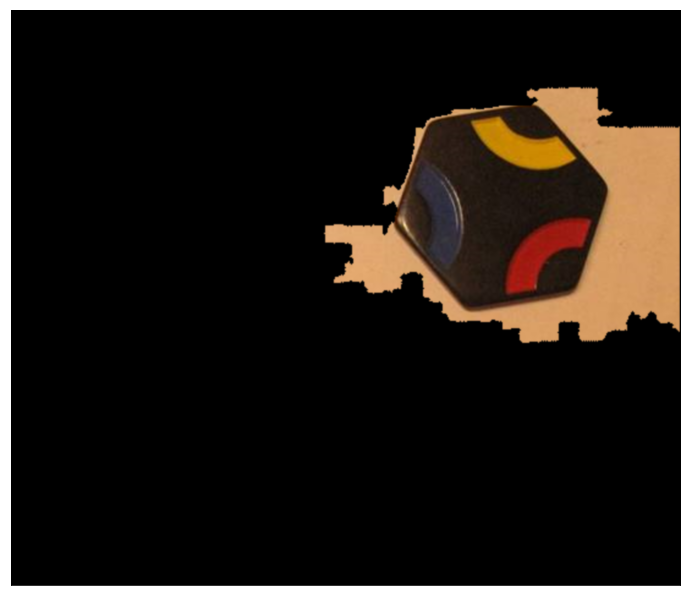

[0.34257858463607327, 0.31601949907547489, 0.34140191628845185]

In [680]:
img_segment = img.copy()
img_segment[markers != 3] = [0, 0, 0]
show(img_segment)
generate_color_features(img_segment)

## segmentation (поставить перед feature selection)

Заставить исчезнуть полоски

In [672]:
def get_segments_markers(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img, low_bg, high_bg)
    res = cv2.bitwise_and(img, img, mask=mask)
    gray = cv2.cvtColor(cv2.cvtColor(res,cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
    sure_fg = cv2.dilate(opening,kernel,iterations=1)
    sure_bg = cv2.bitwise_not(cv2.dilate(opening,kernel, iterations=15))
    unknown = cv2.bitwise_and(cv2.bitwise_not(sure_bg), cv2.bitwise_not(sure_fg))
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0
    return cv2.watershed(img,markers)

In [673]:
markers = get_segments_markers(img)

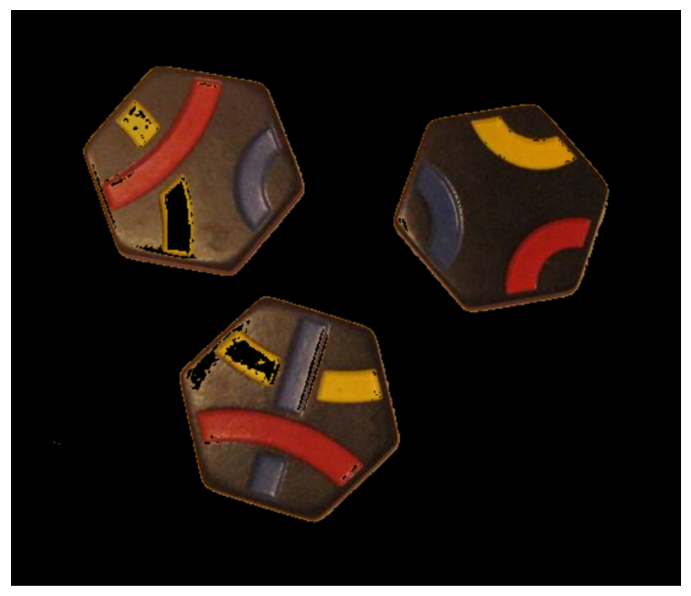

In [659]:
img = cv2.imread("data/samples/Group_2.bmp", cv2.IMREAD_COLOR)
mask = cv2.inRange(img, low_bg, high_bg)
res = cv2.bitwise_and(img, img, mask=mask)
show(res)

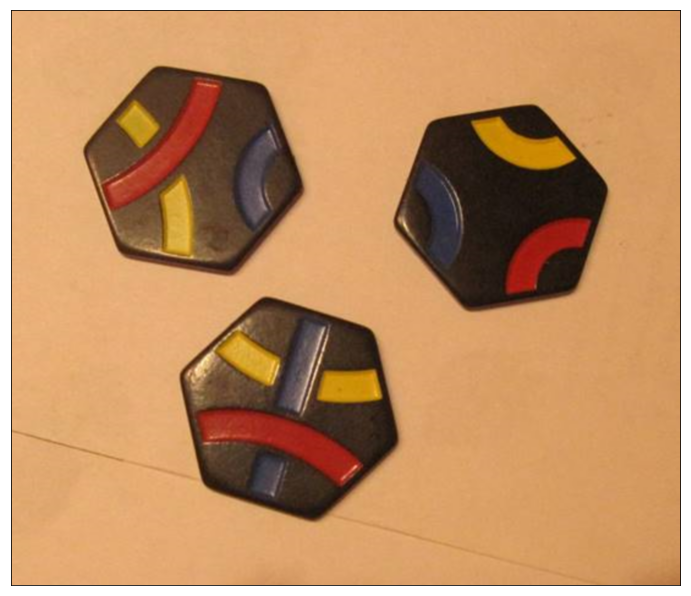

In [646]:
show(img)

In [647]:
gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [648]:
kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
sure_fg = cv2.dilate(opening,kernel,iterations=1)
sure_bg = cv2.bitwise_not(cv2.dilate(opening,kernel, iterations=15))
unknown = cv2.bitwise_and(cv2.bitwise_not(sure_bg), cv2.bitwise_not(sure_fg))

In [649]:
cv2show(sure_bg)

In [650]:
ret, markers = cv2.connectedComponents(sure_fg)

In [651]:
markers = markers+1

In [652]:
markers[unknown==255] = 0

In [653]:
markers = cv2.watershed(img,markers)


In [674]:
img[markers == -1] = [255,0,0]

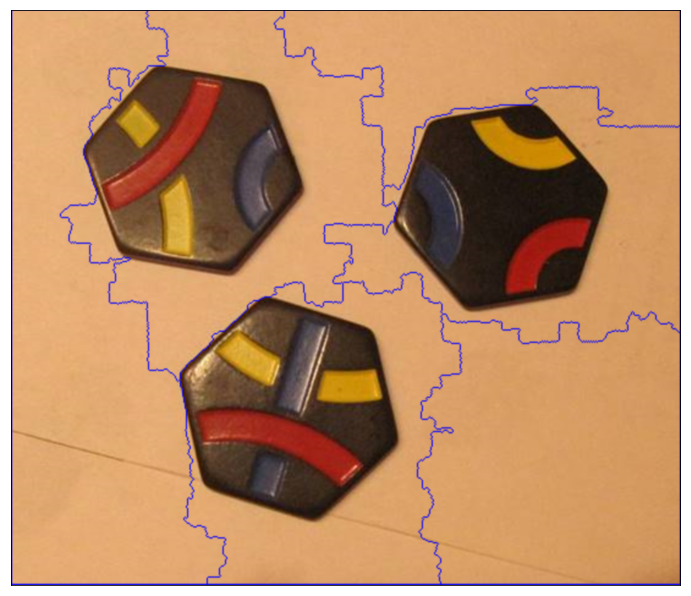

In [675]:
show(img)